In [41]:
# Standard imports for computation physics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import typing
import scienceplots

# Pretty styling for graphs
plt.style.use(['science', 'grid', 'scatter', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

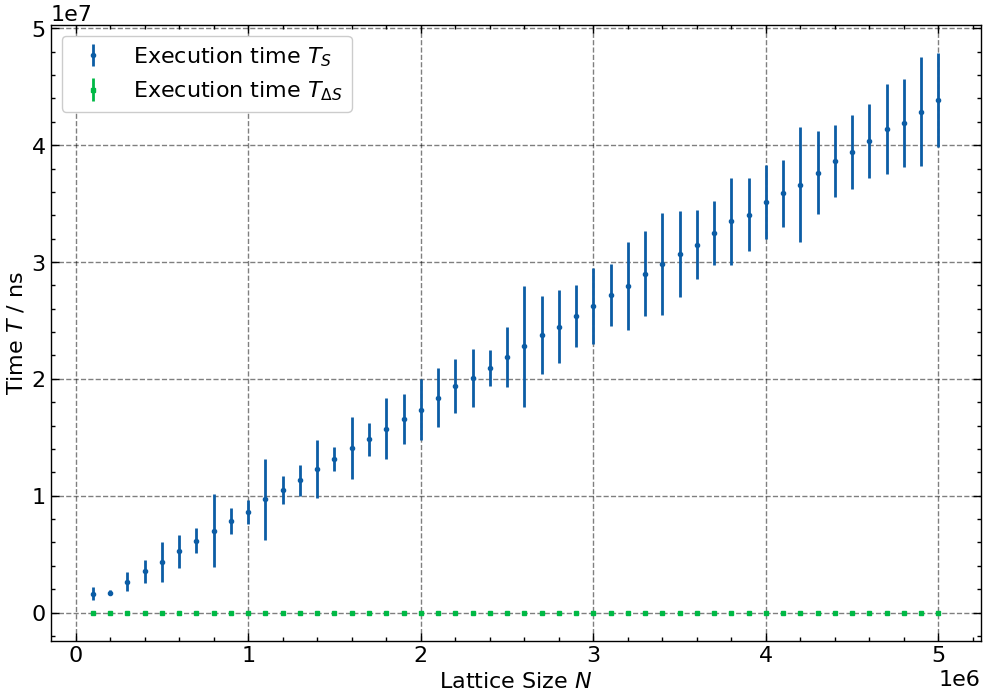

In [42]:
lattice_scaling_data = pd.read_csv('output/lattice_scaling.csv')
plt.errorbar(lattice_scaling_data['Lattice'], lattice_scaling_data['Action'], yerr=lattice_scaling_data['DeltaAction'], label='Execution time $T_S$')
plt.errorbar(lattice_scaling_data['Lattice'], lattice_scaling_data['DiffAction'], yerr=lattice_scaling_data['DeltaDiffAction'], label='Execution time $T_{\\Delta S}$')

plt.xlabel('Lattice Size $N$')
plt.ylabel('Time $T$ / ns')

plt.legend(loc='upper left')


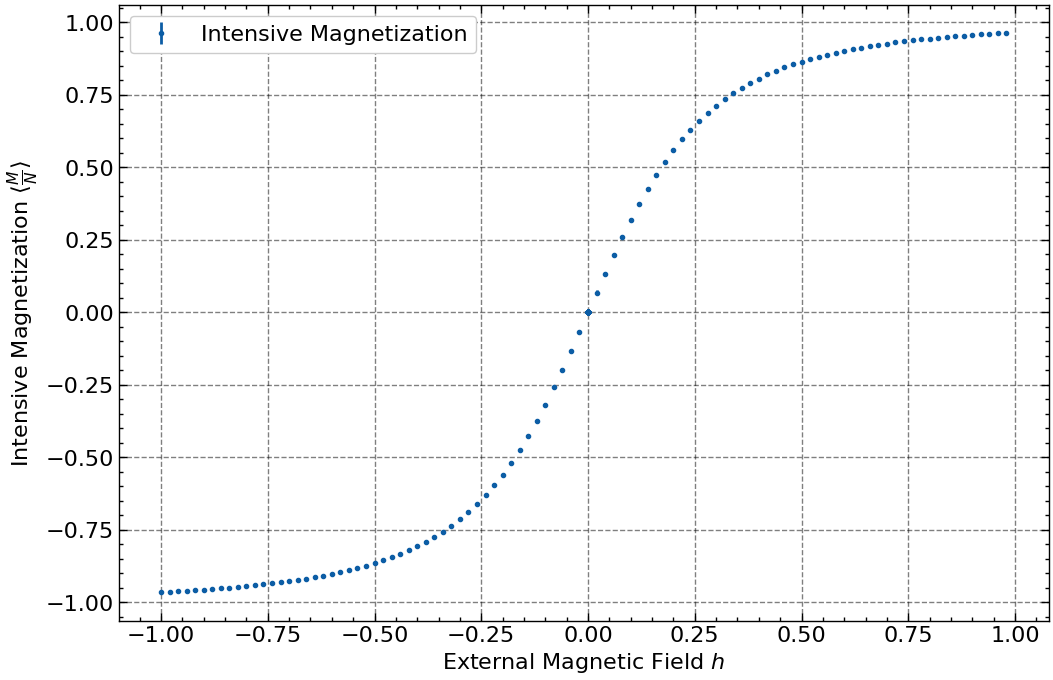

In [46]:
def test(h):
    beta = 1
    j = 1
    return np.sinh(h * beta) / np.sqrt(np.sinh(h * beta)**2 * np.exp(-4 * j * beta))


#sampling = np.linspace(-1, 1, num=100);
#plt.errorbar(sampling, test(sampling))

data = pd.read_csv('output/metropolis.csv')
plt.errorbar(data['h'], data['magnetization'], yerr=data['delta_magnetization'], label='Intensive Magnetization')

plt.xlabel('External Magnetic Field $h$')
plt.ylabel('Intensive Magnetization $\\langle \\frac{M}{N} \\rangle$')
plt.legend()

plt.savefig('output/intensive_magnetization.pdf', dpi=600, bbox_inches='tight')

<ErrorbarContainer object of 3 artists>

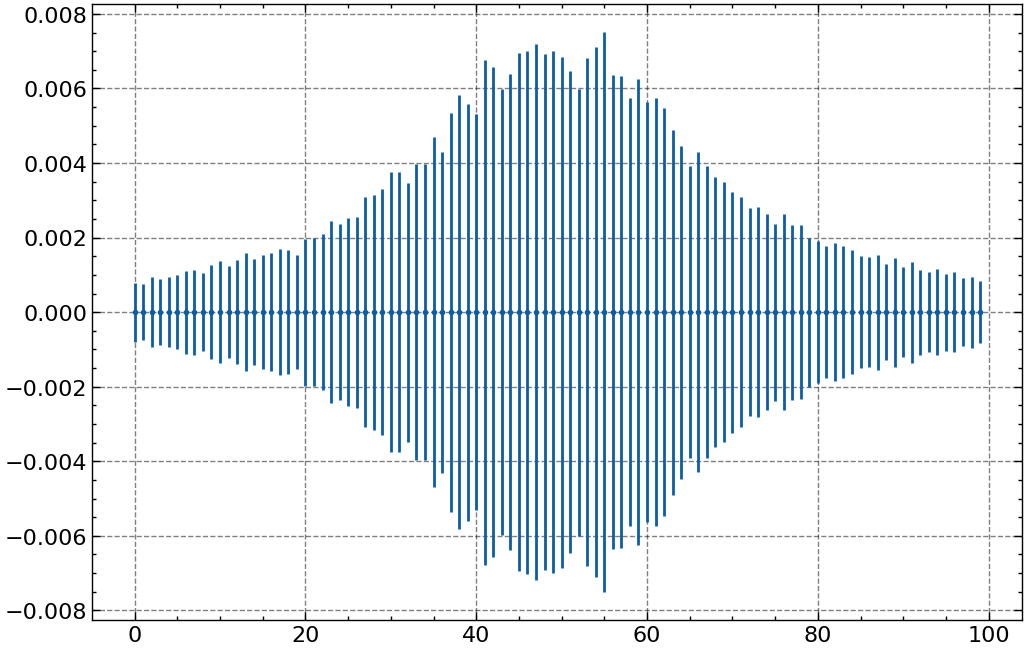

In [44]:
x = np.arange(len(data['h']))
plt.errorbar(x, [0] * x, yerr=data['delta_magnetization'], label='Intensive Magnetization')
